<a href="https://colab.research.google.com/github/kalai2315/Machine-Learning/blob/main/LDA_loadsdigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import datasets

In [3]:
digits = datasets.load_digits()

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
data1 = pd.DataFrame(digits.data)
data1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [6]:
y = pd.DataFrame(digits.target,columns=["target"])
y

,target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [7]:
data1.shape

(1797, 64)

In [8]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
x= digits.data
y= digits.target

In [10]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
sc = StandardScaler()

In [13]:
x_scaled= sc.fit_transform(x)
x_scaled


array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [14]:
lda = LinearDiscriminantAnalysis()  #--------> n_components = min(n_classes - 1, n_feature)
x_lda = lda.fit_transform(x_scaled,y)
x_lda.shape

(1797, 9)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_lda, y, test_size = 0.2,random_state= 999)

In [16]:
x_train

array([[ 1.54895826,  1.84863251, -2.89993288, ..., -1.74469398,
        -0.39708569, -0.26704185],
       [ 4.43956486,  1.8465278 ,  3.66181923, ...,  1.0539554 ,
        -1.70055389,  0.0807146 ],
       [-2.6551934 , -5.45657807,  0.15463825, ..., -1.09266392,
         1.03098879,  0.5017253 ],
       ...,
       [ 1.22086302,  2.58069391,  1.43808578, ..., -0.7496981 ,
         2.40455803, -0.13187568],
       [ 0.19779635,  0.13398836, -3.65890844, ..., -0.98789115,
        -1.19067584,  0.24076929],
       [ 3.70522644,  1.45166459,  2.65066976, ...,  1.14243661,
        -0.99408021,  0.13305323]])

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
y_pred = rf.predict(x_test)

In [20]:
y_pred

array([9, 3, 3, 1, 3, 6, 9, 6, 1, 4, 8, 8, 4, 5, 8, 8, 3, 6, 9, 1, 9, 2,
       2, 5, 7, 6, 8, 8, 2, 2, 6, 0, 2, 2, 3, 0, 2, 6, 0, 0, 2, 1, 3, 9,
       1, 2, 2, 3, 7, 0, 9, 1, 2, 4, 4, 0, 7, 6, 7, 3, 5, 9, 0, 3, 1, 2,
       5, 6, 6, 8, 2, 4, 9, 4, 4, 1, 2, 0, 6, 6, 5, 7, 0, 4, 9, 2, 6, 8,
       1, 9, 4, 0, 9, 0, 7, 6, 2, 0, 6, 8, 1, 0, 6, 6, 3, 4, 7, 9, 4, 2,
       6, 5, 6, 0, 5, 5, 9, 8, 1, 8, 1, 0, 4, 9, 4, 5, 3, 4, 7, 7, 8, 9,
       8, 1, 1, 8, 2, 4, 6, 4, 0, 9, 6, 6, 4, 2, 3, 6, 6, 4, 0, 1, 1, 7,
       3, 7, 8, 0, 1, 6, 2, 3, 9, 6, 2, 1, 7, 4, 0, 4, 7, 5, 5, 7, 9, 1,
       5, 4, 9, 4, 8, 1, 3, 4, 3, 1, 1, 4, 3, 5, 2, 4, 7, 6, 9, 6, 8, 0,
       2, 1, 0, 8, 0, 2, 0, 9, 2, 9, 2, 3, 4, 2, 7, 9, 2, 4, 0, 8, 8, 1,
       9, 2, 4, 4, 0, 3, 5, 5, 6, 5, 9, 9, 9, 4, 9, 8, 3, 8, 2, 0, 6, 6,
       3, 0, 7, 2, 6, 0, 1, 1, 9, 9, 3, 7, 4, 1, 8, 9, 0, 3, 3, 0, 5, 2,
       4, 2, 7, 7, 9, 0, 5, 8, 6, 2, 4, 2, 3, 4, 3, 8, 5, 8, 4, 5, 5, 2,
       4, 1, 0, 3, 9, 2, 0, 5, 0, 1, 1, 7, 7, 1, 2,

In [21]:
y_test

array([9, 3, 3, 1, 3, 6, 9, 6, 1, 4, 8, 8, 4, 5, 8, 8, 3, 6, 9, 1, 9, 2,
       2, 5, 7, 6, 8, 8, 2, 2, 6, 0, 2, 2, 3, 0, 2, 6, 0, 0, 2, 1, 3, 9,
       1, 2, 2, 5, 7, 0, 9, 2, 2, 4, 4, 0, 7, 6, 7, 3, 5, 9, 0, 3, 1, 2,
       5, 6, 6, 8, 2, 0, 9, 4, 4, 1, 2, 0, 6, 6, 5, 7, 0, 4, 9, 2, 6, 8,
       1, 9, 4, 0, 9, 0, 7, 6, 2, 0, 6, 9, 1, 0, 6, 6, 3, 4, 7, 9, 4, 2,
       6, 5, 6, 0, 5, 5, 9, 8, 1, 8, 1, 0, 4, 9, 4, 5, 3, 4, 7, 7, 8, 9,
       3, 1, 8, 8, 2, 4, 6, 4, 0, 9, 6, 6, 4, 2, 3, 6, 6, 4, 0, 1, 1, 7,
       3, 7, 8, 0, 8, 6, 2, 3, 9, 2, 2, 1, 7, 4, 0, 4, 7, 5, 5, 7, 9, 1,
       5, 4, 9, 4, 8, 1, 3, 4, 3, 1, 1, 4, 9, 5, 2, 4, 7, 6, 9, 6, 8, 0,
       2, 1, 0, 8, 0, 2, 0, 9, 2, 9, 2, 3, 4, 2, 7, 9, 2, 4, 0, 8, 8, 1,
       9, 2, 4, 4, 0, 3, 5, 5, 6, 5, 9, 7, 9, 4, 9, 3, 3, 8, 2, 0, 6, 6,
       3, 0, 7, 2, 6, 0, 1, 1, 9, 9, 3, 7, 4, 1, 8, 9, 0, 3, 3, 0, 5, 2,
       4, 2, 7, 7, 9, 0, 5, 8, 6, 2, 4, 2, 3, 4, 3, 8, 5, 8, 4, 5, 5, 2,
       4, 9, 0, 3, 9, 2, 0, 5, 0, 1, 1, 7, 7, 1, 6,

In [22]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[39,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1, 43,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 26,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 25,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  1, 40]])

In [23]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.89      0.97      0.93        35
           2       0.98      0.96      0.97        45
           3       0.94      0.91      0.93        35
           4       0.98      1.00      0.99        45
           5       1.00      0.96      0.98        27
           6       0.94      0.97      0.96        35
           7       1.00      0.96      0.98        28
           8       0.89      0.93      0.91        27
           9       0.95      0.93      0.94        43

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



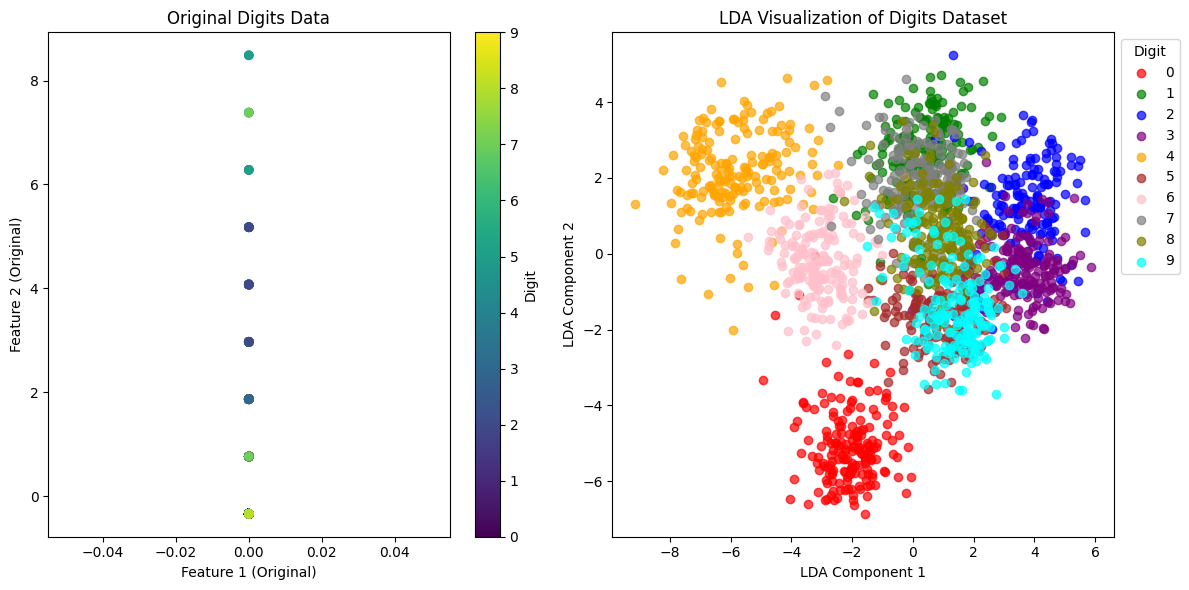

In [24]:
# Visualize the original data before LDA

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(x_scaled[:,0], x_scaled[:,1],c=y, cmap='viridis')
plt.colorbar(label='Digit')
plt.xlabel('Feature 1 (Original)')
plt.ylabel('Feature 2 (Original)')
plt.title('Original Digits Data')

# Visualize the LDA classes after LDA

plt.subplot(1, 2, 2)
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

for target_value, color in zip(np.unique(y), colors): #0,,1,2,3,...9 #red, green
    plt.scatter(x_lda[y == target_value, 0], x_lda[y == target_value, 1], color=color, label=str(target_value), alpha=0.7)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization of Digits Dataset')
plt.legend(title='Digit', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()